In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('C:/Users/varsh/Downloads/archive (1)\IRIS.csv')  # Replace with your path
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
print("total_columns = ",df.shape[0])
print("Null values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())
df=df.drop_duplicates()
print("Duplicates removed. Remaining rows:", df.shape[0])
df.head()

total_columns =  150
Null values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Duplicated values: 3
Duplicates removed. Remaining rows: 147


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


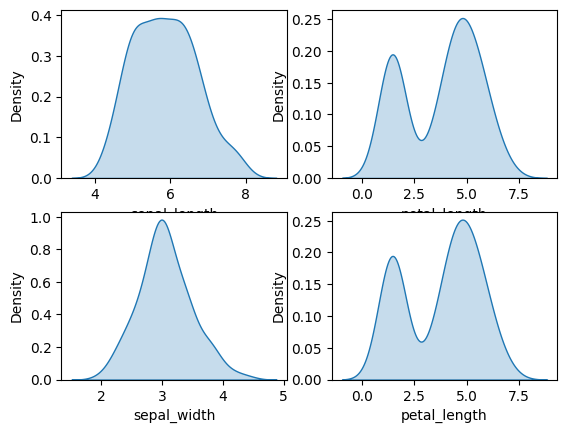

In [39]:
plt.subplot(2, 2, 1) #plt.subplot(rows, columns, plot_number)(left)
sns.kdeplot(df['sepal_length'], fill=True)

plt.subplot(2, 2, 3)  # 1 row, 2 columns, plot 2(right)
sns.kdeplot(df['sepal_width'], fill=True)

plt.subplot(2, 2, 2)  # Bottom-Left
sns.kdeplot(df['petal_length'], fill=True)

plt.subplot(2, 2, 4)  # Bottom-Right
sns.kdeplot(df['petal_length'], fill=True)

plt.show()

In [40]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species'] 

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

with open('trained_model.sav', 'wb') as f:
    pickle.dump((svc, scaler, le), f)

print(" Model, scaler, and encoder saved as trained_model.sav")


 Model, scaler, and encoder saved as trained_model.sav


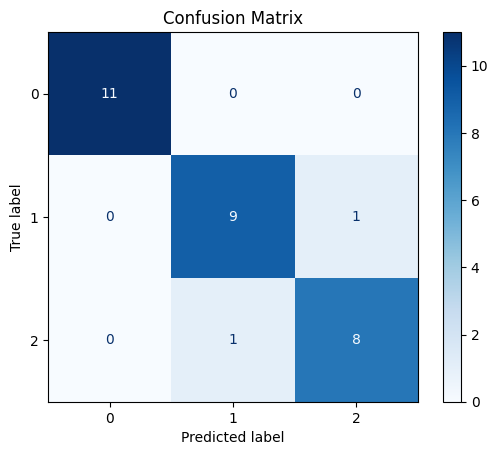

In [41]:
cm=confusion_matrix(y_test, y_pred)            #A confusion matrix is a table that shows the number of: TP,TN,FP,FN
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [46]:
sample=[[6.5, 3.0, 5.5, 2.0]] # Prediction for given input
sample_scaled=scaler.transform(sample)
predicted_class=svc.predict(sample_scaled)

# Directly take the predicted label
predicted_label=predicted_class[0]

print(f"\nPrediction for input {sample}: {predicted_label}")



Prediction for input [[6.5, 3.0, 5.5, 2.0]]: 2
